# Task 1: Data Preparation

In [ ]:
!pip install gdownload

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!gdown 1ZF7SbltEK_DH81xIGlwG4LOEg9MbwsBh

Downloading...
From (original): https://drive.google.com/uc?id=1ZF7SbltEK_DH81xIGlwG4LOEg9MbwsBh
From (redirected): https://drive.google.com/uc?id=1ZF7SbltEK_DH81xIGlwG4LOEg9MbwsBh&confirm=t&uuid=839cd59e-592d-40f1-84ed-396b7f2f2766
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 50.3MB/s]


In [ ]:
# use this after renaming the downloaded file to devnagari digit.zip
!unzip devnagari\ digit.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [ ]:
!pip install keras tensorflow

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers,models
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image

Training set:(17000, 28, 28, 1), Labels:(17000, 10)
Testing set: (3000, 28, 28, 1), Labels:(3000, 10)


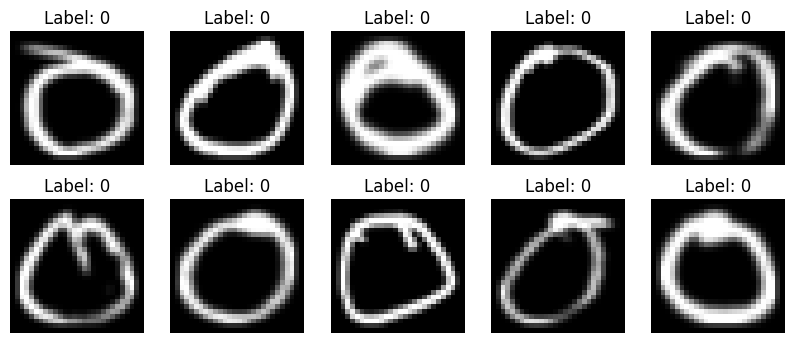

In [ ]:
from pickle import load
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test/"

img_height, img_width = 28, 28
num_classes = 10

def load_and_preprocess_image(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder))
  class_map = {name: i for i, name in enumerate(class_names)}
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for img_name in os.listdir(class_path):
      img_path = os.path.join(class_path, img_name)
      img = Image.open(img_path).convert('L')
      img = img.resize((img_height, img_width))
      img = np.array(img) / 255.0

      images.append(img)
      labels.append(label)

  return np.array(images), np.array(labels)

x_train, y_train = load_and_preprocess_image(train_dir)
x_test, y_test = load_and_preprocess_image(test_dir)

x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"Training set:{x_train.shape}, Labels:{y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels:{y_test.shape}")

plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i].reshape(img_height, img_width), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")

plt.show()


# Task 2: Build the FCN Model

In [ ]:
model = models.Sequential(
    [
        layers.Input(shape = (img_height, img_width, 1)),
        layers.Flatten(),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(256, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

In [ ]:
model.compile(
    optimizer = "adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Task 4: Train the Model

In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = "best_model.keras", save_best_only=True, monitor='val_loss'),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3052 - loss: 2.0094 - val_accuracy: 0.0000e+00 - val_loss: 7.3414
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8314 - loss: 0.6359 - val_accuracy: 0.0000e+00 - val_loss: 8.4511
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9299 - loss: 0.2781 - val_accuracy: 0.0000e+00 - val_loss: 9.2567
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9502 - loss: 0.1875 - val_accuracy: 0.0000e+00 - val_loss: 9.5753
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9601 - loss: 0.1466 - val_accuracy: 0.0000e+00 - val_loss: 9.8415
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9685 - loss: 0.1125 - val_accuracy: 0.0000e+00 - val_loss: 10.0502


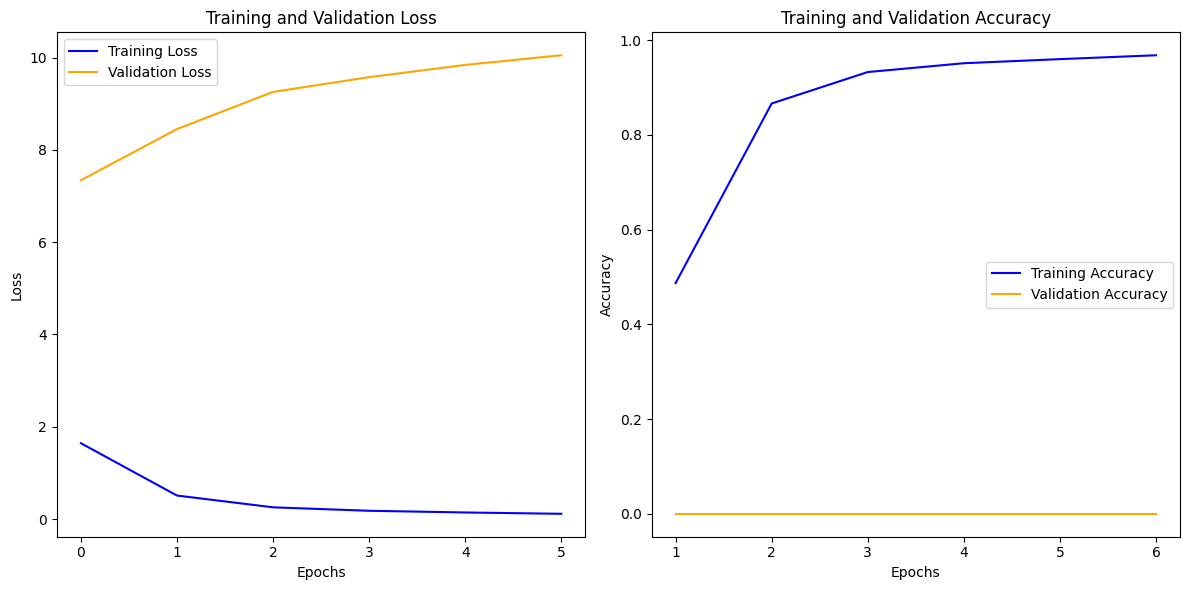

In [ ]:
train_loss = history.history ['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", color="blue")
plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", color="orange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 5: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.6200 - loss: 2.1241
Test Loss: 2.1241
Test Accuracy: 0.6200


# Task 6: Save and Load the Model

In [ ]:
model.save('devnagari_connected_model.h5')
loaded_model = keras.models.load_model('devnagari_connected_model.h5')

# Task 7: Predictions

In [ ]:
prediction = loaded_model.predict(x_test)
predicted_labels = np.argmax(prediction, axis =1)
true_label = np.argmax(y_test, axis = 1)

print(f'Predicted label for first image:{predicted_labels[:5]}')
print(f'True label for first image:{np.argmax(y_test[0])}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image:[0 0 0 0 0]
True label for first image:0


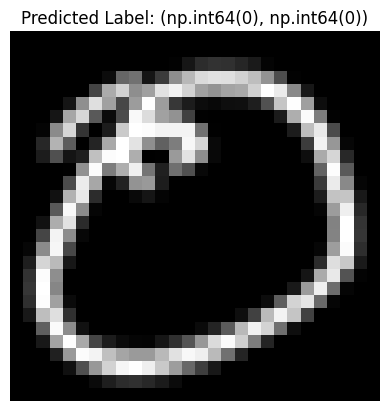

In [ ]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')
plt.title(f"Predicted Label: {predicted_labels[0], np.argmax(y_test[0])}")
plt.axis("off")
plt.show()

# **Improving the Accuracy**

In [ ]:
# using data augmnetation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.1
)

datagen.fit(x_train)

In [ ]:
imp_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = "best_improved_model.keras", save_best_only=True, monitor='val_loss'),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

# Training new model
history_new = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=500,
    validation_data=(x_test, y_test),
    callbacks=imp_callbacks
)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5441 - loss: 1.4396 - val_accuracy: 0.8587 - val_loss: 0.5730
Epoch 2/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7484 - loss: 0.7820 - val_accuracy: 0.8830 - val_loss: 0.3876
Epoch 3/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8065 - loss: 0.6053 - val_accuracy: 0.9070 - val_loss: 0.3123
Epoch 4/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.8534 - loss: 0.4827 - val_accuracy: 0.9290 - val_loss: 0.2507
Epoch 5/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8755 - loss: 0.4036 - val_accuracy: 0.9443 - val_loss: 0.2036
Epoch 6/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.8945 - loss: 0.3345 - val_accuracy: 0.9513 - val_loss: 0.1768
Epoch 7/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9112 - loss: 0.2897 - val_accuracy: 0.9567 - val_loss: 0.1512
Epoch 8/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9214 - loss: 0.2597 - val_accurac

In [ ]:
imp_test_loss, imp_test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"Improved Test Loss: {imp_test_loss:.4f}")
print(f"Improved Test Accuracy: {imp_test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.9823 - loss: 0.0620
Improved Test Loss: 0.0620
Improved Test Accuracy: 0.9823


In [ ]:
model.save('devnagari_connected_improved_model.h5')
loaded_improved_model = keras.models.load_model('devnagari_connected_improved_model.h5')

In [ ]:
predictions_improved = loaded_improved_model.predict(x_test)
predicted_improved_labels = np.argmax(predictions_improved, axis = 1)

print(f'Predicted label for first image:{predicted_improved_labels[0]}')
print(f'True label for first image:{np.argmax(y_test[0])}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image:0
True label for first image:0


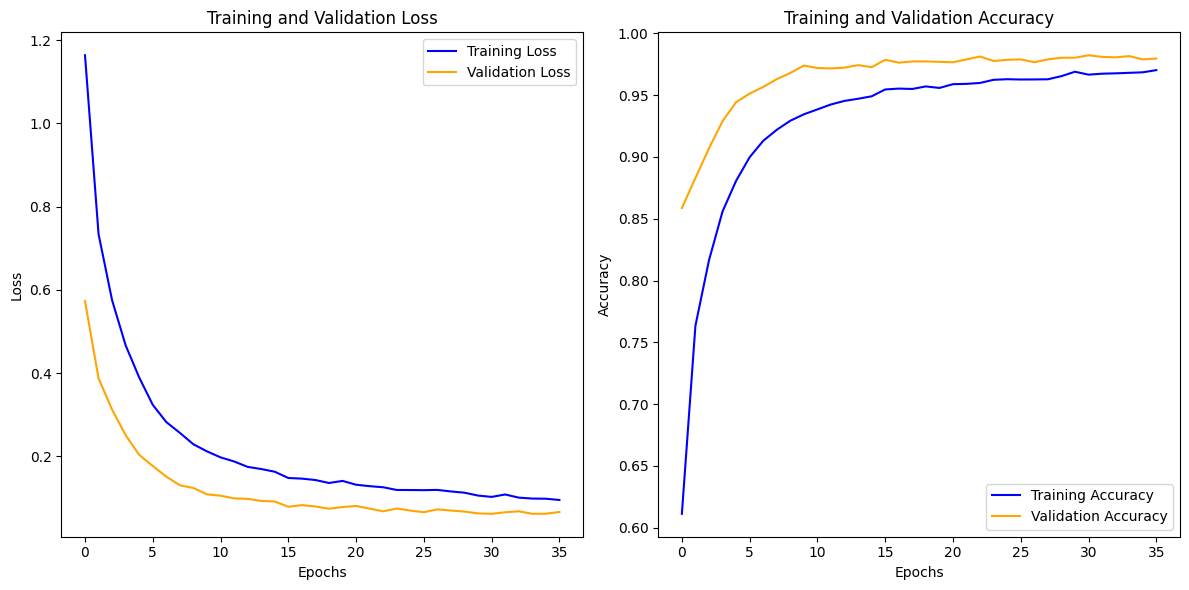

In [ ]:
train_loss = history_new.history ['loss']
val_loss = history_new.history['val_loss']

train_acc = history_new.history['accuracy']
val_acc = history_new.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="Training Accuracy", color="blue")
plt.plot(val_acc, label="Validation Accuracy", color="orange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()